In [1]:
import pandas as pd
import statsmodels.api as sm

def clean_crash_summary(file_path):
    # Read the CSV file
    crash_summary = pd.read_csv(file_path)

    # Filter and select relevant columns
    crash_summary_clean = crash_summary[(crash_summary['Jurisdiction'] == 'State Road') &
                                        (~crash_summary['Weather Condition'].isna())].drop(columns=['Collision Type'])

    # Create binary columns and convert categorical columns to category type
    crash_summary_clean = crash_summary_clean.assign(
        **{
            'School Zone': crash_summary_clean['School Zone'].apply(lambda x: 1 if x == 'Y' else 0),
            'Intersection Related': crash_summary_clean['Intersection Related'].apply(lambda x: 1 if x == 'Y' else 0),
            'Damage Threshold Met': crash_summary_clean['Damage Threshold Met'].apply(lambda x: 1 if x == 'Y' else 0),
            'Hit and Run': crash_summary_clean['Hit and Run'].apply(lambda x: 1 if x == 'Y' else 0),
            'Passengers Involved': crash_summary_clean['Passengers Involved'].apply(lambda x: 1 if x == 'Y' else 0),
            'Commercial Carrier Involved': crash_summary_clean['Commercial Carrier Involved'].apply(lambda x: 1 if x == 'Y' else 0),
            'School Bus Involved': crash_summary_clean['School Bus Involved'].apply(lambda x: 1 if x == 'Y' else 0),
            'Agency': crash_summary_clean['Agency'].astype('category'),
            'Weather Condition': crash_summary_clean['Weather Condition'].astype('category'),
            'Lighting Condition': crash_summary_clean['Lighting Condition'].astype('category'),
            'Injury Severity': crash_summary_clean['Injury Severity'].astype('category')
        }
    )
    
    return crash_summary_clean

#if __name__ == '__main__':
#    clean_df = clean_crash_summary("WA_Crash_Summary.csv")

In [2]:
clean_df = clean_crash_summary("WA_Crash_Summary.csv")

In [8]:
clean_df.columns

Index(['Collision Report Number', 'Collision Date', 'County', 'City',
       'Jurisdiction', 'Agency', 'Primary Trafficway', 'Secondary Trafficway',
       'Block Number', 'Mile Post', 'School Zone', 'Intersection Related',
       'Weather Condition', 'Lighting Condition', 'Injury Severity',
       'Object Struck', 'Damage Threshold Met', 'Hit and Run',
       'Motor Vehicles Involved', 'Passengers Involved',
       'Commercial Carrier Involved', 'School Bus Involved',
       'Pedestrians Involved', 'Pedalcyclists Involved'],
      dtype='object')

In [9]:
selected_columns = clean_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

                             Mile Post  School Zone  Intersection Related  \
Mile Post                     1.000000     0.003096             -0.094714   
School Zone                   0.003096     1.000000              0.011441   
Intersection Related         -0.094714     0.011441              1.000000   
Damage Threshold Met         -0.015150     0.000371              0.007430   
Hit and Run                   0.004240    -0.004483              0.011571   
Motor Vehicles Involved      -0.011766    -0.002666              0.043495   
Passengers Involved           0.016253     0.000891              0.038235   
Commercial Carrier Involved   0.016682    -0.003709             -0.008730   
School Bus Involved          -0.006927    -0.000252              0.014149   
Pedestrians Involved         -0.013020    -0.000955              0.023211   
Pedalcyclists Involved       -0.016713    -0.000472              0.035248   

                             Damage Threshold Met  Hit and Run  \
Mile Post

### QUESTION 2

QUESTION:  
What are the key predictors contributing to road collisions in Washington state at various scales (County, City level, type of road such as state or city.)?  
Now all state. So more specific to answer which is County Level (39), City Level (267)

IDEAS:


In [11]:
# Random Forest
# Model would look like by using Injury Severity(5 level) or Damage Threshold Met 
# Unknown Injury Collision, No Injury Collision, Minor Injury Collision, Serious Injury Collision, Fatal Collision

In [4]:
final_df = pd.read_csv("Car_Crash_Cleaned_AADT.csv")
final_df.head()

,Collision Report Number,Collision Date,County,City,Jurisdiction,Agency,Primary Trafficway,Primary Road Number,Secondary Trafficway,Secondary Road Number,...,Object Struck,Damage Threshold Met,Hit and Run,Motor Vehicles Involved,Passengers Involved,Commercial Carrier Involved,School Bus Involved,Pedestrians Involved,Pedalcyclists Involved,AADT
0,EC12134,1/1/2022 12:13:00 AM,King,Bellevue,State Road,State Patrol,WB I 90,90.0,FROM SB I-405,405.0,...,barrier,1,0,1,0,0,0,0,0,84000.0
1,EC09140,1/1/2022 12:26:00 AM,Kitsap,Bremerton,State Road,State Patrol,SR 3,3.0,NaN,NaN,...,Concrete/Jersey Barrier,1,0,1,0,0,0,0,0,80000.0
2,EC28579,1/1/2022 12:33:00 AM,Spokane,Airway Heights,State Road,Municipal/City Police,HWY 2,2.0,GARFIELD RD,NaN,...,NaN,0,0,2,1,0,0,0,0,5400.0
3,EC28579,1/1/2022 12:33:00 AM,Spokane,Airway Heights,State Road,Municipal/City Police,HWY 2,2.0,GARFIELD RD,NaN,...,NaN,1,0,2,1,0,0,0,0,5400.0
4,EC09574,1/1/2022 12:48:00 AM,Grant,Mattawa,State Road,State Patrol,SR 243,243.0,MORRISON ROAD,NaN,...,none,1,1,2,1,0,0,0,0,5200.0


/tmp/ipykernel_93/2736073508.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lighting Condition', y='Total Collisions', data=lighting_summary, palette='viridis')


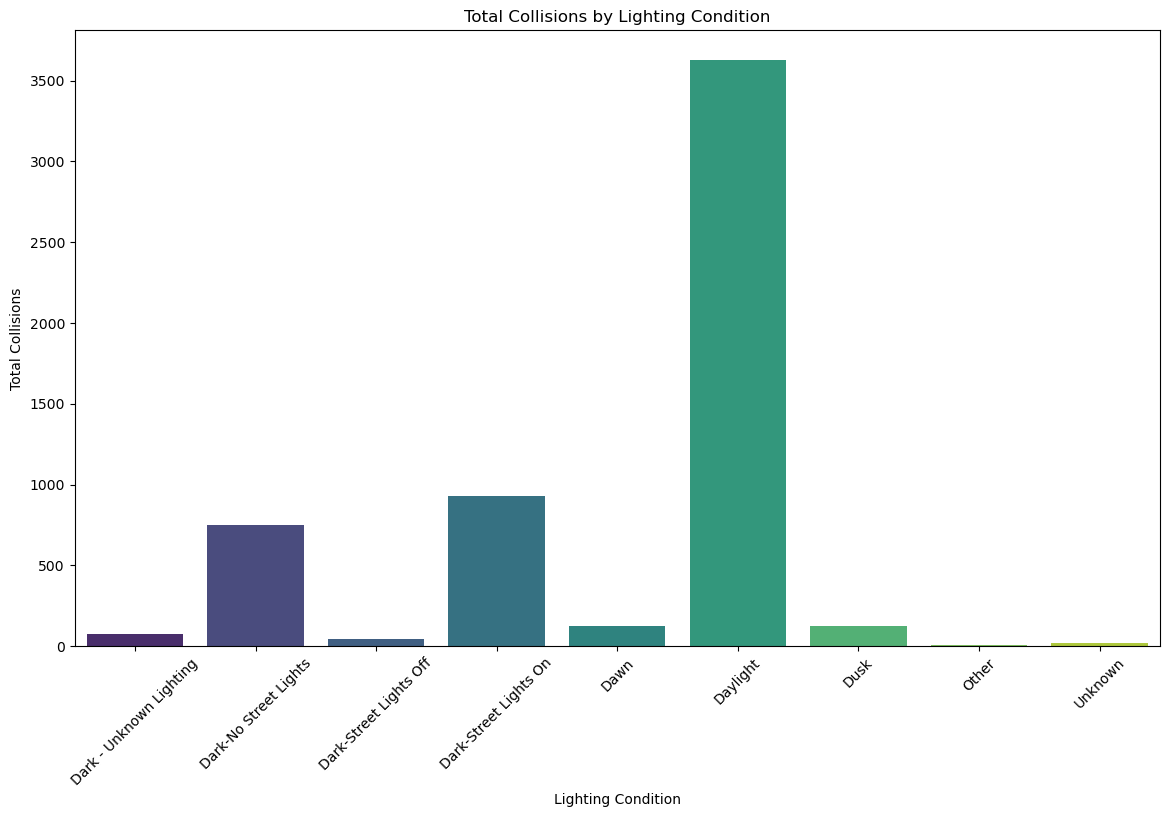

In [57]:
# Grouping data by Lighting Condition and calculating summary statistics
lighting_summary = sampled_df.groupby('Lighting Condition').agg({
    'Collision Report Number': 'count',
    'Motor Vehicles Involved': 'sum',
    'Passengers Involved': 'sum',
    'Commercial Carrier Involved': 'sum',
    'School Bus Involved': 'sum',
    'Pedestrians Involved': 'sum',
    'Pedalcyclists Involved': 'sum',
    'AADT': 'mean'
}).reset_index()

# Renaming columns for clarity
lighting_summary.rename(columns={
    'Collision Report Number': 'Total Collisions',
    'Motor Vehicles Involved': 'Total Vehicles Involved',
    'Passengers Involved': 'Total Passengers Involved',
    'Commercial Carrier Involved': 'Total Commercial Carriers Involved',
    'School Bus Involved': 'Total School Buses Involved',
    'Pedestrians Involved': 'Total Pedestrians Involved',
    'Pedalcyclists Involved': 'Total Pedalcyclists Involved',
    'AADT': 'Average AADT'
}, inplace=True)

# Bar plot for total collisions by lighting condition
plt.figure(figsize=(14, 8))
sns.barplot(x='Lighting Condition', y='Total Collisions', data=lighting_summary, palette='viridis')
plt.title('Total Collisions by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Total Collisions')
plt.xticks(rotation=45)
plt.show()

In [55]:
x

,Collision Report Number,Collision Date,County,City,Jurisdiction,Agency,Primary Trafficway,Primary Road Number,Secondary Trafficway,Secondary Road Number,...,Object Struck,Damage Threshold Met,Hit and Run,Motor Vehicles Involved,Passengers Involved,Commercial Carrier Involved,School Bus Involved,Pedestrians Involved,Pedalcyclists Involved,AADT
0,EC12134,1/1/2022 12:13:00 AM,King,Bellevue,State Road,State Patrol,WB I 90,90.0,FROM SB I-405,405.0,...,barrier,1,0,1,0,0,0,0,0,84000.0
1,EC09140,1/1/2022 12:26:00 AM,Kitsap,Bremerton,State Road,State Patrol,SR 3,3.0,NaN,NaN,...,Concrete/Jersey Barrier,1,0,1,0,0,0,0,0,80000.0
2,EC28579,1/1/2022 12:33:00 AM,Spokane,Airway Heights,State Road,Municipal/City Police,HWY 2,2.0,GARFIELD RD,NaN,...,NaN,0,0,2,1,0,0,0,0,5400.0
3,EC28579,1/1/2022 12:33:00 AM,Spokane,Airway Heights,State Road,Municipal/City Police,HWY 2,2.0,GARFIELD RD,NaN,...,NaN,1,0,2,1,0,0,0,0,5400.0
4,EC09574,1/1/2022 12:48:00 AM,Grant,Mattawa,State Road,State Patrol,SR 243,243.0,MORRISON ROAD,NaN,...,none,1,1,2,1,0,0,0,0,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43417,ED21608,12/30/2022 11:33:00 PM,Cowlitz,Woodland,State Road,State Patrol,INTERSTATE 5,5.0,DIKE ROAD,NaN,...,Guardrail,1,0,1,0,0,0,0,0,67000.0
43418,ED20667,12/30/2022 11:50:00 PM,King,North Bend,State Road,State Patrol,WB I-90,90.0,MP 53,NaN,...,Over Embankment,1,0,2,1,0,0,0,0,33000.0
43419,ED21604,12/30/2022 11:51:00 PM,King,Federal Way,State Road,State Patrol,SOUTHBOUND I-5,5.0,W/B STATE ROUTE 18,18.0,...,NaN,1,1,2,0,0,0,0,0,178000.0
43420,ED22593,12/30/2022 11:51:00 PM,King,Snohomish,State Road,State Patrol,WB I-90,90.0,HYAK,NaN,...,Concrete/Jersey Barrier,0,0,2,1,1,0,0,0,33000.0


In [34]:
x.columns

Index(['Collision Report Number', 'Collision Date', 'County', 'City',
       'Jurisdiction', 'Agency', 'Primary Trafficway', 'Primary Road Number',
       'Secondary Trafficway', 'Secondary Road Number',
       'Associated State Road Number', 'Block Number', 'Mile Post',
       'School Zone', 'Intersection Related', 'Weather Condition',
       'Lighting Condition', 'Injury Severity', 'Object Struck',
       'Damage Threshold Met', 'Hit and Run', 'Motor Vehicles Involved',
       'Passengers Involved', 'Commercial Carrier Involved',
       'School Bus Involved', 'Pedestrians Involved', 'Pedalcyclists Involved',
       'AADT'],
      dtype='object')

In [37]:
x = pd.read_csv("Car_Crash_Cleaned_AADT.csv")
len(x['Associated State Road Number'].unique())

175

In [3]:
final_df.columns

Index(['Collision Report Number', 'Collision Date', 'County', 'City',
       'Jurisdiction', 'Agency', 'Primary Trafficway', 'Primary Road Number',
       'Secondary Trafficway', 'Secondary Road Number',
       'Associated State Road Number', 'Block Number', 'Mile Post',
       'School Zone', 'Intersection Related', 'Weather Condition',
       'Lighting Condition', 'Injury Severity', 'Object Struck',
       'Damage Threshold Met', 'Hit and Run', 'Motor Vehicles Involved',
       'Passengers Involved', 'Commercial Carrier Involved',
       'School Bus Involved', 'Pedestrians Involved', 'Pedalcyclists Involved',
       'AADT'],
      dtype='object')

/tmp/ipykernel_255/3002312036.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Collision Date'] = pd.to_datetime(final_df['Collision Date'])


                      Collision Date  Primary Road Number  \
count                          43422         42993.000000   
mean   2022-07-12 03:47:58.267237888           150.931570   
min              2022-01-01 00:13:00             2.000000   
25%              2022-04-12 19:03:00             5.000000   
50%              2022-07-14 23:02:00            82.000000   
75%              2022-10-17 09:42:15           240.000000   
max              2022-12-30 23:51:00           971.000000   
std                              NaN           193.721939   

       Secondary Road Number  Associated State Road Number     Mile Post  \
count           10822.000000                  43422.000000  39596.000000   
mean              225.425614                    150.906522     87.635891   
min                 2.000000                      2.000000      0.010000   
25%                16.000000                      5.000000     11.400000   
50%               161.000000                     82.000000     46.0000

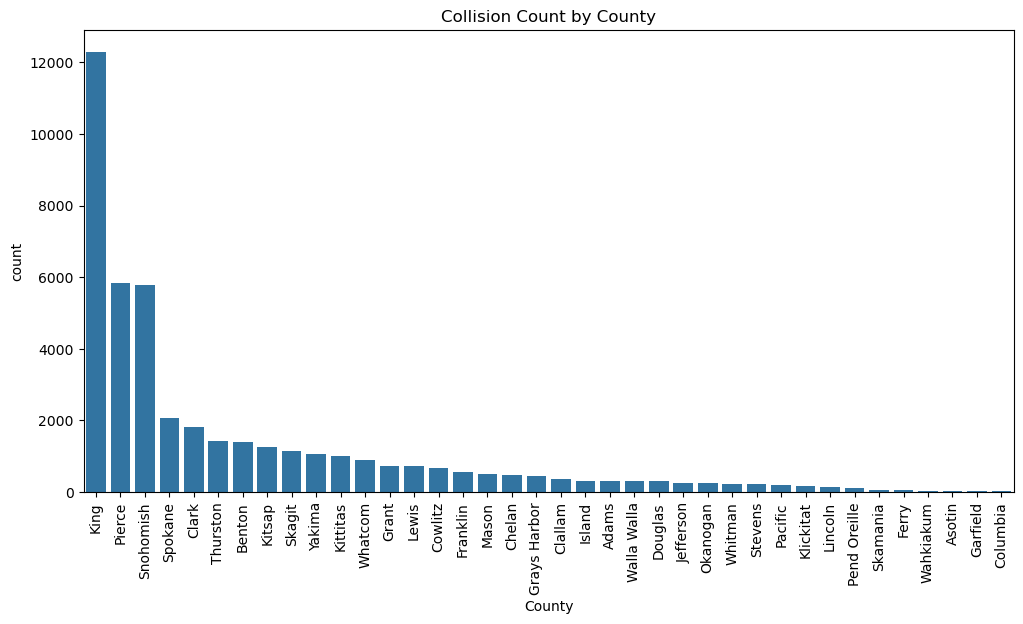

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


final_df = pd.read_csv("Car_Crash_Cleaned_AADT.csv")

# Check for missing values
missing_values = final_df.isnull().sum()

# Convert Collision Date to datetime
final_df['Collision Date'] = pd.to_datetime(final_df['Collision Date'])

# Feature Engineering: Extract year, month, day, hour
final_df['Year'] = final_df['Collision Date'].dt.year
final_df['Month'] = final_df['Collision Date'].dt.month
final_df['Hour'] = final_df['Collision Date'].dt.hour

# Descriptive statistics
print(final_df.describe())

# Visualization: Example for County Level
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='County', order=final_df['County'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Collision Count by County')
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the data
final_df = pd.read_csv("Car_Crash_Cleaned_AADT.csv")

# Check for missing values
missing_values = final_df.isnull().sum()

# Convert Collision Date to datetime
final_df['Collision Date'] = pd.to_datetime(final_df['Collision Date'], errors='coerce')

# Handle any parsing errors by dropping rows with invalid dates
final_df = final_df.dropna(subset=['Collision Date'])

# Feature Engineering: Extract year, month, day, hour
final_df['Year'] = final_df['Collision Date'].dt.year
final_df['Month'] = final_df['Collision Date'].dt.month
final_df['Hour'] = final_df['Collision Date'].dt.hour
final_df['DayOfWeek'] = final_df['Collision Date'].dt.dayofweek

# Binary Variables
binary_variables = ['Hit and Run', 'Commercial Carrier Involved', 'School Bus Involved', 'Pedestrians Involved', 'Pedalcyclists Involved']

# Define features and target
features = ['County', 'City', 'Jurisdiction', 'Primary Trafficway', 'Weather Condition', 'Lighting Condition', 'AADT', 'Year', 'Month', 'Hour', 'DayOfWeek'] + binary_variables
target = 'Injury Severity'

X = final_df[features]
y = final_df[target]

# Preprocessing: One-hot encoding for categorical features and scaling for numerical features
categorical_features = ['County', 'City', 'Jurisdiction', 'Primary Trafficway', 'Weather Condition', 'Lighting Condition']
numerical_features = ['AADT', 'Year', 'Month', 'Hour', 'DayOfWeek']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with a RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score for each class
y_pred_proba = pipeline.predict_proba(X_test)

roc_auc_scores = {}
for i, class_label in enumerate(pipeline.named_steps['classifier'].classes_):
    roc_auc_scores[class_label] = roc_auc_score((y_test == class_label).astype(int), y_pred_proba[:, i])

print("ROC AUC Scores:", roc_auc_scores)


/tmp/ipykernel_255/1339765014.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Collision Date'] = pd.to_datetime(final_df['Collision Date'], errors='coerce')


                          precision    recall  f1-score   support

         Fatal Collision       0.92      0.32      0.48        75
  Minor Injury Collision       0.70      0.24      0.36      1884
     No Injury Collision       0.78      0.97      0.86      6350
Serious Injury Collision       0.80      0.27      0.40       162
Unknown Injury Collision       0.89      0.32      0.47       214

                accuracy                           0.78      8685
               macro avg       0.82      0.42      0.51      8685
            weighted avg       0.77      0.78      0.73      8685

[[  24    2   49    0    0]
 [   0  461 1419    3    1]
 [   2  183 6150    8    7]
 [   0    8  111   43    0]
 [   0    0  146    0   68]]
ROC AUC Scores: {'Fatal Collision': 0.7156562137049942, 'Minor Injury Collision': 0.7120507443797293, 'No Injury Collision': 0.7265543172199835, 'Serious Injury Collision': 0.7171850171576404, 'Unknown Injury Collision': 0.8115042304861998}


/tmp/ipykernel_93/978151106.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  car_crash_data['Collision Date'] = pd.to_datetime(car_crash_data['Collision Date'], errors='coerce')


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.33      0.44        75
           1       0.53      0.31      0.39      1884
           2       0.80      0.91      0.85      6350
           3       0.57      0.23      0.33       162
           4       0.72      0.60      0.66       214

    accuracy                           0.76      8685
   macro avg       0.65      0.48      0.53      8685
weighted avg       0.73      0.76      0.73      8685

Confusion Matrix:
 [[  25    6   44    0    0]
 [   6  589 1271   11    7]
 [   7  483 5800   18   42]
 [   0   25   98   38    1]
 [   0   10   75    0  129]]
Top 5 Feature Importances:
                          Feature  Importance
15                          AADT    0.323968
2             Primary Trafficway    0.270182
3   Associated State Road Number    0.135715
7             Lighting Condition    0.067223
6              Weather Condition    0.064303


/tmp/ipykernel_93/978151106.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


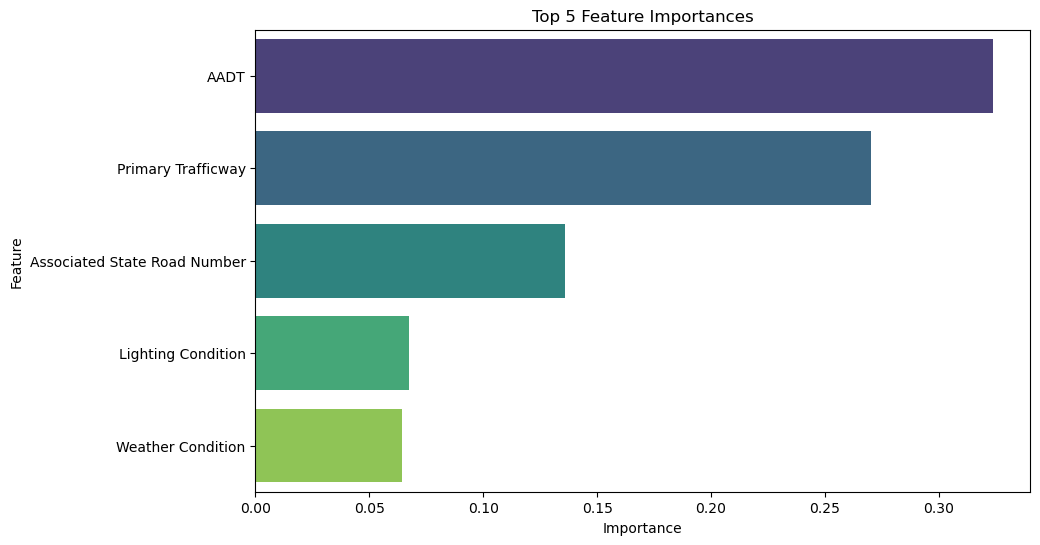

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Car_Crash_Cleaned_AADT.csv'
car_crash_data = pd.read_csv(file_path)


# Convert the "Collision Date" column to datetime
car_crash_data['Collision Date'] = pd.to_datetime(car_crash_data['Collision Date'], errors='coerce')

# Dropping specified columns
columns_to_drop = [
    'City', 'Primary Road Number', 'Secondary Trafficway', 
    'Secondary Road Number', 'Block Number', 'Mile Post', 'Object Struck'
]
car_crash_data_cleaned = car_crash_data.drop(columns=columns_to_drop)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Weather Condition', 'Lighting Condition', 'Jurisdiction', 'Agency']:
    car_crash_data_cleaned[column] = label_encoder.fit_transform(car_crash_data_cleaned[column])

# Investigate and convert the problematic column 'Primary Trafficway'
car_crash_data_cleaned['Primary Trafficway'] = label_encoder.fit_transform(car_crash_data_cleaned['Primary Trafficway'])

# Features and target variable
X = car_crash_data_cleaned.drop(columns=['Collision Report Number', 'Collision Date', 'County', 'Injury Severity', 'Damage Threshold Met'])
y = car_crash_data_cleaned['Injury Severity']

# Encode target variable
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("Top 5 Feature Importances:\n", importance_df)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [16]:
#car_crash_data[(car_crash_data["County"] == "King") & (car_crash_data["City"] == "Seattle")] 3835
# car_crash_data[car_crash_data["County"] == "King"] 12293

,Collision Report Number,Collision Date,County,City,Jurisdiction,Agency,Primary Trafficway,Primary Road Number,Secondary Trafficway,Secondary Road Number,...,Object Struck,Damage Threshold Met,Hit and Run,Motor Vehicles Involved,Passengers Involved,Commercial Carrier Involved,School Bus Involved,Pedestrians Involved,Pedalcyclists Involved,AADT
0,EC12134,2022-01-01 00:13:00,King,Bellevue,State Road,State Patrol,WB I 90,90.0,FROM SB I-405,405.0,...,barrier,1,0,1,0,0,0,0,0,84000.0
16,EC07169,2022-01-01 04:49:00,King,Federal Way,State Road,State Patrol,NB I-5,5.0,SR-18,18.0,...,NaN,1,0,1,0,0,0,0,0,135000.0
17,EC07459,2022-01-01 05:52:00,King,Seattle,State Road,State Patrol,INTERSTATE 5,5.0,MERCER ST,NaN,...,NaN,1,1,2,0,0,0,0,0,180000.0
29,EC07499,2022-01-01 12:28:00,King,Seattle,State Road,State Patrol,SB I-5,5.0,NaN,NaN,...,NaN,1,1,3,1,0,0,0,0,190000.0
30,EC07499,2022-01-01 12:28:00,King,Seattle,State Road,State Patrol,SB I-5,5.0,NaN,NaN,...,NaN,0,1,3,1,0,0,0,0,190000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43410,ED20647,2022-12-30 22:00:00,King,Federal Way,State Road,State Patrol,SB I-5,5.0,S 320TH ST,NaN,...,Guardrail,1,1,2,1,0,0,0,0,178000.0
43418,ED20667,2022-12-30 23:50:00,King,North Bend,State Road,State Patrol,WB I-90,90.0,MP 53,NaN,...,Over Embankment,1,0,2,1,0,0,0,0,33000.0
43419,ED21604,2022-12-30 23:51:00,King,Federal Way,State Road,State Patrol,SOUTHBOUND I-5,5.0,W/B STATE ROUTE 18,18.0,...,NaN,1,1,2,0,0,0,0,0,178000.0
43420,ED22593,2022-12-30 23:51:00,King,Snohomish,State Road,State Patrol,WB I-90,90.0,HYAK,NaN,...,Concrete/Jersey Barrier,0,0,2,1,1,0,0,0,33000.0


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.52      0.35      0.42       159
           2       0.83      0.92      0.87       583
           3       0.50      0.10      0.17        10
           4       0.80      0.80      0.80        10

    accuracy                           0.78       767
   macro avg       0.68      0.55      0.58       767
weighted avg       0.76      0.78      0.77       767

Confusion Matrix:
 [[  3   2   0   0   0]
 [  1  56 102   0   0]
 [  0  46 534   1   2]
 [  0   4   5   1   0]
 [  0   0   2   0   8]]
Top 5 Feature Importances:
                         Feature  Importance
2            Primary Trafficway    0.332961
14                         AADT    0.319025
8       Motor Vehicles Involved    0.100147
6            Lighting Condition    0.073413
5             Weather Condition    0.069676
7                   Hit and Run    0.029595
9           Pass

/tmp/ipykernel_93/1309408110.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


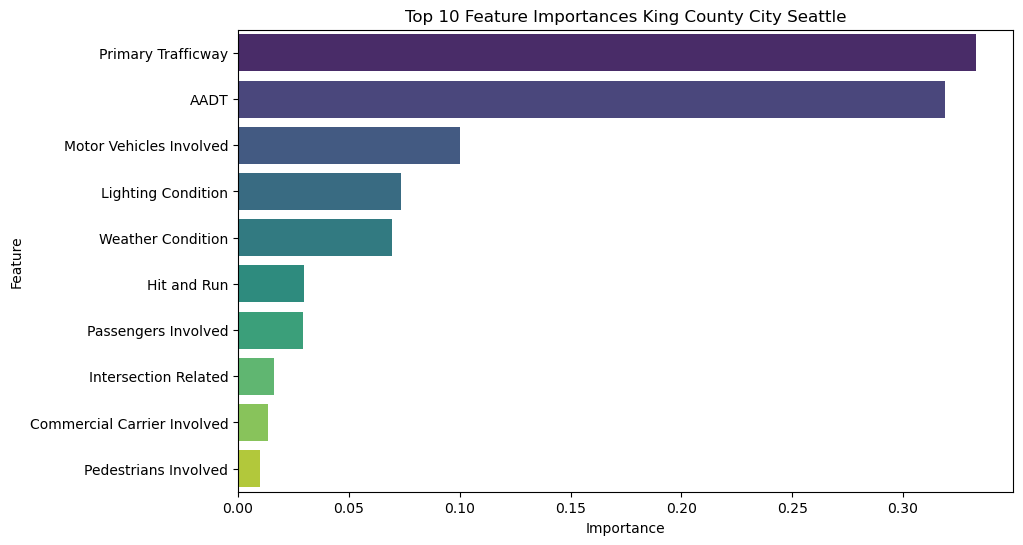

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Car_Crash_Cleaned_AADT.csv'
car_crash_data = pd.read_csv(file_path)
car_crash_data = car_crash_data[(car_crash_data["County"] == "King") & (car_crash_data["City"] == "Seattle")]

# Convert the "Collision Date" column to datetime
car_crash_data['Collision Date'] = pd.to_datetime(car_crash_data['Collision Date'], errors='coerce')

# Dropping specified columns
columns_to_drop = [
    'City', 'Primary Road Number', 'Secondary Trafficway', 
    'Secondary Road Number', 'Block Number', 'Mile Post', 'Object Struck', 'Associated State Road Number'
]
car_crash_data_cleaned = car_crash_data.drop(columns=columns_to_drop)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Weather Condition', 'Lighting Condition', 'Jurisdiction', 'Agency']:
    car_crash_data_cleaned[column] = label_encoder.fit_transform(car_crash_data_cleaned[column])

# Investigate and convert the problematic column 'Primary Trafficway'
car_crash_data_cleaned['Primary Trafficway'] = label_encoder.fit_transform(car_crash_data_cleaned['Primary Trafficway'])

# Features and target variable
X = car_crash_data_cleaned.drop(columns=['Collision Report Number', 'Collision Date', 'County', 'Injury Severity', 'Damage Threshold Met'])
y = car_crash_data_cleaned['Injury Severity']

# Encode target variable
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("Top 5 Feature Importances:\n", importance_df)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances King County City Seattle')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [54]:
df = pd.read_csv("Car_Crash_Cleaned_AADT.csv")

filtered_df = df.groupby('Associated State Road Number').filter(lambda x: len(x) > 100)


sampled_df = filtered_df.groupby('Associated State Road Number').apply(lambda y: y.sample(100)).reset_index(drop=True)

sampled_df

,Collision Report Number,Collision Date,County,City,Jurisdiction,Agency,Primary Trafficway,Primary Road Number,Secondary Trafficway,Secondary Road Number,...,Object Struck,Damage Threshold Met,Hit and Run,Motor Vehicles Involved,Passengers Involved,Commercial Carrier Involved,School Bus Involved,Pedestrians Involved,Pedalcyclists Involved,AADT
0,ED03877,11/7/2022 7:35:00 PM,Spokane,Spokane,State Road,State Patrol,SR 2,2.0,W OF S GEIGER BLVD,NaN,...,Cable Barrier,1,0,1,0,0,0,0,0,42000.0
1,EC09241,1/4/2022 1:40:00 PM,Snohomish,Gold Bar,State Road,State Patrol,SR 2,2.0,383RD AVE SE,NaN,...,NaN,1,0,2,0,0,0,0,0,13000.0
2,EC69017,7/27/2022 1:09:00 PM,King,Skykomish,State Road,State Patrol,STATE ROUTE 2,2.0,OLD CASCADE HWY,NaN,...,"Guardrail, Speed Limit Sign",1,0,2,1,0,0,0,0,4900.0
3,EC34984,3/31/2022 9:15:00 PM,Snohomish,Everett,State Road,State Patrol,SR 2,2.0,I 5,5.0,...,Bridge Rail,1,0,1,0,0,0,0,0,16000.0
4,ED13324,12/9/2022 6:54:00 PM,Spokane,Spokane,State Road,State Patrol,STATE ROUTE 2,2.0,NaN,NaN,...,NaN,0,1,2,0,0,0,0,0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,EC43655,4/25/2022 11:22:00 AM,King,Issaquah,State Road,State Patrol,EB SR 900,900.0,190TH AVE SE,NaN,...,NaN,0,1,2,0,1,0,0,0,17000.0
5696,EC52688,6/4/2022 5:37:00 PM,King,Issaquah,State Road,State Patrol,WB SR 900,900.0,MAY VALLEY RD,NaN,...,NaN,1,0,1,0,0,0,0,0,17000.0
5697,EC43655,4/25/2022 11:22:00 AM,King,Issaquah,State Road,State Patrol,EB SR 900,900.0,190TH AVE SE,NaN,...,NaN,1,1,2,0,1,0,0,0,17000.0
5698,EC85204,9/18/2022 4:46:00 PM,King,Renton,State Road,State Patrol,EB SR 900,900.0,148TH AVE SE,NaN,...,NaN,1,0,2,1,0,0,0,0,7900.0


In [50]:
sampled_df['Primary Trafficway'].unique

<bound method Series.unique of 0       SR 2                
1       EB SR 2             
2       SR 2                
3       SR2                 
4       US HWY 2            
                ...         
5695    WB SR900            
5696    EB SR900            
5697    WB SR-900           
5698    WB SR-900           
5699    EAST SR 900         
Name: Primary Trafficway, Length: 5700, dtype: object>

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.46      0.12      0.19       268
           2       0.73      0.94      0.82       808
           3       0.33      0.05      0.08        22
           4       0.50      0.44      0.47        27

    accuracy                           0.71      1140
   macro avg       0.50      0.34      0.35      1140
weighted avg       0.65      0.71      0.64      1140

Confusion Matrix:
 [[  2   1  11   0   1]
 [  1  32 233   0   2]
 [  1  35 761   2   9]
 [  0   2  19   1   0]
 [  0   0  15   0  12]]
Top 10 Feature Importances:
                         Feature  Importance
5            Lighting Condition    0.239155
4             Weather Condition    0.210570
7       Motor Vehicles Involved    0.200893
6                   Hit and Run    0.079254
1                        Agency    0.071946
8           Passengers Involved    0.054385
3          Inte

/tmp/ipykernel_93/912962815.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


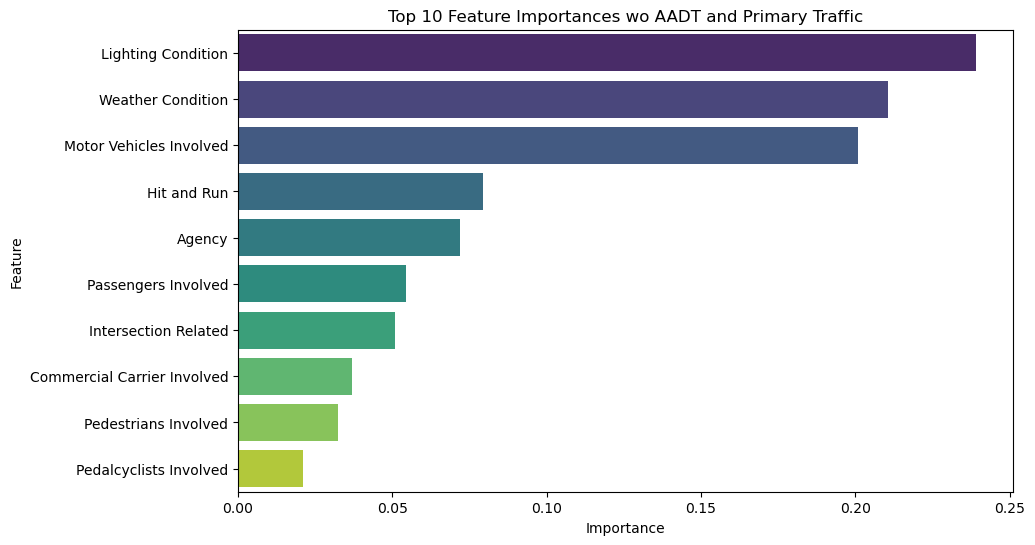

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#file_path = 'Car_Crash_Cleaned_AADT.csv'
#car_crash_data = pd.read_csv(file_path)
#car_crash_data = car_crash_data[(car_crash_data["County"] != "King") & (car_crash_data["County"] != "Pierce") & (car_crash_data["County"] != "Snohomish")]

car_crash_data = sampled_df

# Convert the "Collision Date" column to datetime
car_crash_data['Collision Date'] = pd.to_datetime(car_crash_data['Collision Date'], errors='coerce')

# Dropping specified columns
columns_to_drop = [
    'City', 'Primary Road Number', 'Secondary Trafficway', 
    'Secondary Road Number', 'Block Number', 'Mile Post', 'Object Struck', 'Associated State Road Number',
    'Primary Trafficway', 'AADT'
]
car_crash_data_cleaned = car_crash_data.drop(columns=columns_to_drop)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Weather Condition', 'Lighting Condition', 'Jurisdiction', 'Agency']:
    car_crash_data_cleaned[column] = label_encoder.fit_transform(car_crash_data_cleaned[column])

# Investigate and convert the problematic column 'Primary Trafficway'
#car_crash_data_cleaned['Primary Trafficway'] = label_encoder.fit_transform(car_crash_data_cleaned['Primary Trafficway'])

# Features and target variable
X = car_crash_data_cleaned.drop(columns=['Collision Report Number', 'Collision Date', 'County', 'Injury Severity', 'Damage Threshold Met'])
y = car_crash_data_cleaned['Injury Severity']

# Encode target variable
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("Top 10 Feature Importances:\n", importance_df)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances wo AADT and Primary Traffic')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [24]:
car_crash_data[
King Pierce Snohomish

,Collision Report Number,Collision Date,County,City,Jurisdiction,Agency,Primary Trafficway,Primary Road Number,Secondary Trafficway,Secondary Road Number,...,Object Struck,Damage Threshold Met,Hit and Run,Motor Vehicles Involved,Passengers Involved,Commercial Carrier Involved,School Bus Involved,Pedestrians Involved,Pedalcyclists Involved,AADT
0,EC12134,2022-01-01 00:13:00,King,Bellevue,State Road,State Patrol,WB I 90,90.0,FROM SB I-405,405.0,...,barrier,1,0,1,0,0,0,0,0,84000.0
1,EC09140,2022-01-01 00:26:00,Kitsap,Bremerton,State Road,State Patrol,SR 3,3.0,NaN,NaN,...,Concrete/Jersey Barrier,1,0,1,0,0,0,0,0,80000.0
2,EC28579,2022-01-01 00:33:00,Spokane,Airway Heights,State Road,Municipal/City Police,HWY 2,2.0,GARFIELD RD,NaN,...,NaN,0,0,2,1,0,0,0,0,5400.0
3,EC28579,2022-01-01 00:33:00,Spokane,Airway Heights,State Road,Municipal/City Police,HWY 2,2.0,GARFIELD RD,NaN,...,NaN,1,0,2,1,0,0,0,0,5400.0
4,EC09574,2022-01-01 00:48:00,Grant,Mattawa,State Road,State Patrol,SR 243,243.0,MORRISON ROAD,NaN,...,none,1,1,2,1,0,0,0,0,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43417,ED21608,2022-12-30 23:33:00,Cowlitz,Woodland,State Road,State Patrol,INTERSTATE 5,5.0,DIKE ROAD,NaN,...,Guardrail,1,0,1,0,0,0,0,0,67000.0
43418,ED20667,2022-12-30 23:50:00,King,North Bend,State Road,State Patrol,WB I-90,90.0,MP 53,NaN,...,Over Embankment,1,0,2,1,0,0,0,0,33000.0
43419,ED21604,2022-12-30 23:51:00,King,Federal Way,State Road,State Patrol,SOUTHBOUND I-5,5.0,W/B STATE ROUTE 18,18.0,...,NaN,1,1,2,0,0,0,0,0,178000.0
43420,ED22593,2022-12-30 23:51:00,King,Snohomish,State Road,State Patrol,WB I-90,90.0,HYAK,NaN,...,Concrete/Jersey Barrier,0,0,2,1,1,0,0,0,33000.0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Car_Crash_Cleaned_AADT.csv'
car_crash_data = pd.read_csv(file_path)

# Convert the "Collision Date" column to datetime
car_crash_data['Collision Date'] = pd.to_datetime(car_crash_data['Collision Date'], errors='coerce')

# Dropping specified columns
columns_to_drop = [
    'City', 'Primary Road Number', 'Secondary Trafficway', 
    'Secondary Road Number', 'Block Number', 'Mile Post', 'Object Struck', 'Associated State Road Number',
    'Primary Trafficway', 'Secondary Trafficway', 'AADT', 'Agency'
]
car_crash_data_cleaned = car_crash_data.drop(columns=columns_to_drop)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Weather Condition', 'Lighting Condition', 'Jurisdiction']:
    car_crash_data_cleaned[column] = label_encoder.fit_transform(car_crash_data_cleaned[column])



# Features and target variable
X = car_crash_data_cleaned.drop(columns=['Collision Report Number', 'Collision Date', 'County', 'Injury Severity', 'Damage Threshold Met'])
y = car_crash_data_cleaned['Injury Severity']

# Encode target variable
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("Top 5 Feature Importances:\n", importance_df)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances Without AADT and Primary traffic')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [12]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display top 10 important features
print(importance_df)


              precision    recall  f1-score   support

           0       0.66      0.33      0.44        75
           1       0.53      0.31      0.39      1884
           2       0.80      0.91      0.85      6350
           3       0.57      0.23      0.33       162
           4       0.72      0.60      0.66       214

    accuracy                           0.76      8685
   macro avg       0.65      0.48      0.53      8685
weighted avg       0.73      0.76      0.73      8685

[[  25    6   44    0    0]
 [   6  589 1271   11    7]
 [   7  483 5800   18   42]
 [   0   25   98   38    1]
 [   0   10   75    0  129]]
                         Feature  Importance
15                          AADT    0.323968
2             Primary Trafficway    0.270182
3   Associated State Road Number    0.135715
7             Lighting Condition    0.067223
6              Weather Condition    0.064303
9        Motor Vehicles Involved    0.051970
8                    Hit and Run    0.021635
5         

/tmp/ipykernel_255/2979843248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


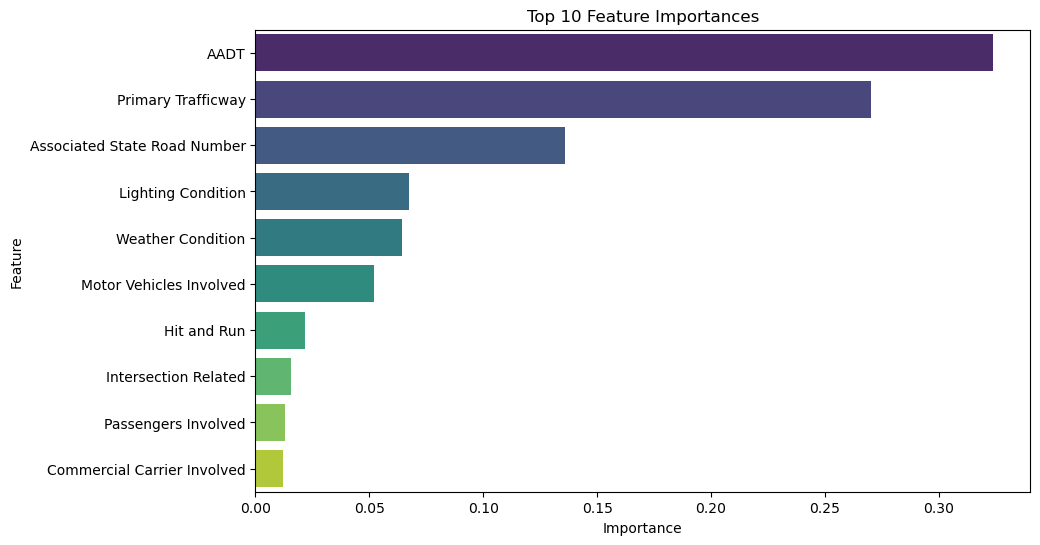

In [13]:
# Visualizing the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Random Forest
# Model would look like by using Injury Severity(5 level) or Damage Threshold Met 
# Unknown Injury Collision, No Injury Collision, Minor Injury Collision, Serious Injury Collision, Fatal Collision

In [1]:
# Multinomial logistc regression 

### QUESTION 5

QUESTION:  
Is there a specific demographic group or set of features that make  an area or individuals more vulnerable to being involved in traffic collisions? 
